# Import lib

In [15]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [16]:
# The latest CDF library https://spdf.gsfc.nasa.gov/pub/software/cdf/dist/latest/
from spacepy import pycdf

# os.environ["CDF_LIB"] = "C:\\Program Files\\CDF_Distribution\\cdf39_0-dist\\lib"
os.environ["CDF_LIB"] = "/Applications/cdf/cdf39_0-dist/lib"

# sys.path.append('../lib/')
sys.path.append('./lib/')

import juice_cdf_lib as juice_cdf

# Setting and Read CDF file

In [17]:
# *** Parameter set ***
spec_mode = 1                           # 0: low-resoltion   1: high-resolution
cal_mode = 0                            # 0: raw    1: dBm    2: V2    3: V2/Hz
cal = 0                                 # 0: background   1: cal

# E_power_min = 1e-4                      # E_power_min: 10e-4 (--> -144 dBm)
f_max = 45000                           # f_max [kHz]
f_min = 80                              # f_min [kHz]
p_max = 8.5                             # background: 8   CAL: 10
p_min = 1.5                             # background: 2   CAL: 5

cf = 0.0                                # Conversion Factor: RAW
if cal_mode == 1:
    cf = -104.1                         # dBm @ ADC input
elif cal_mode == 2:
    cf = -104.1 - 13.01                 # V^2 @ ADC input
"""
* Conversion Factor
    0 dB @ RAW   ==>  -104.1 dBm    @ ADC input
                 ==>  -117.1 dB V^2  = 1.395e-6 V

* ADC input
    20-bit res  (1048576 [120.4 dB)) 
                 ==>  1-bit:  1.395e-6 V [-117.1 dB V^2]        
                      full:   1.463 Vpp
    [real] 14-bit (16384  [84.3 dB])   max 1.2 Vpp

* SG @ EM2-0       5.50 MHz, 0.01 Vpp
    +-13000  ==> 0.018135 Vpp ??
"""

p_max = p_max + cf/10
p_min = p_min + cf/10
if spec_mode == 1:
    p_max = p_max - 1.5
    p_min = p_min - 1.5

# *** Folder set ***
work_dir = '/Users/user/0-python/JUICE_notebook/ql/'   # Plot dump folder
data_dir = '/Users/user/0-python/JUICE_GS_test/cdf/org/'   # Data folder

In [18]:
# *** NECP ***
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230419T135849-20230419T141229_V01___RPR1_52000000_2023.109.16.17.21.607.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230419T141231-20230419T141402_V01___RPR1_52000001_2023.109.17.51.54.600.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230530T100326-20230530T100925_V01___RPR1_52000010_2023.150.10.40.53.663.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230530T100927-20230530T100937_V01___RPR1_52000011_2023.150.10.41.53.508.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230530T100326-20230530T100925_V01___RPR1_52000010_2023.150.10.40.53.663.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230601T120759-20230601T120857_V01___RPR1_52000015_2023.152.12.32.12.471.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230601T121435-20230601T121533_V01___RPR1_52000016_2023.152.13.14.38.473.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230601T122138-20230601T122236_V01___RPR1_52000017_2023.152.13.55.02.539.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230601T122707-20230601T122805_V01___RPR1_52000018_2023.152.14.35.37.467.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20230601T123416-20230601T123514_V01___RPR1_52000019_2023.152.15.15.55.483.cdf'

# *** High-samp rate ***
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000304-20000101T000308_V01___TMIDX_00000_32.bin.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000150-20000101T000154_V01___TMIDX_00000_64.bin.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000355-20000101T000359_V01___TMIDX_00000_96.bin.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000555-20000101T000559_V01___TMIDX_00000_128.bin.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000725-20000101T000730_V01___TMIDX_00000_256.bin.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000131-20000101T000139_V01___TMIDX_00000_512.bin.cdf'

# *** High-samp rate: Tsuchiya ***
data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000031-20000101T000940_V01___HF_SID2_064_20230624-1139.ccs.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000050-20000101T000454_V01___HF_SID2_032_20230624-1132.ccs.cdf'
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000111-20000101T000150_V01___HF_SID2_128_20230624-1306.ccs.cdf'

# *** Ver.2 ***
# data_name = 'JUICE_L1a_RPWI-HF-SID2_20000101T000459-20000101T000700_V01___HF_20210920-1007.ccs.cdf'

cdf_file = data_dir + data_name
# %ls $data_dir
%ls $cdf_file

/Users/user/0-python/JUICE_GS_test/cdf/org/JUICE_L1a_RPWI-HF-SID2_20000101T000031-20000101T000940_V01___HF_SID2_064_20230624-1139.ccs.cdf


# get SID-2 data

In [19]:
cdf = pycdf.CDF(cdf_file)
data = juice_cdf.juice_getdata_hf_sid02(cdf)

# Raw data

2000/01/01


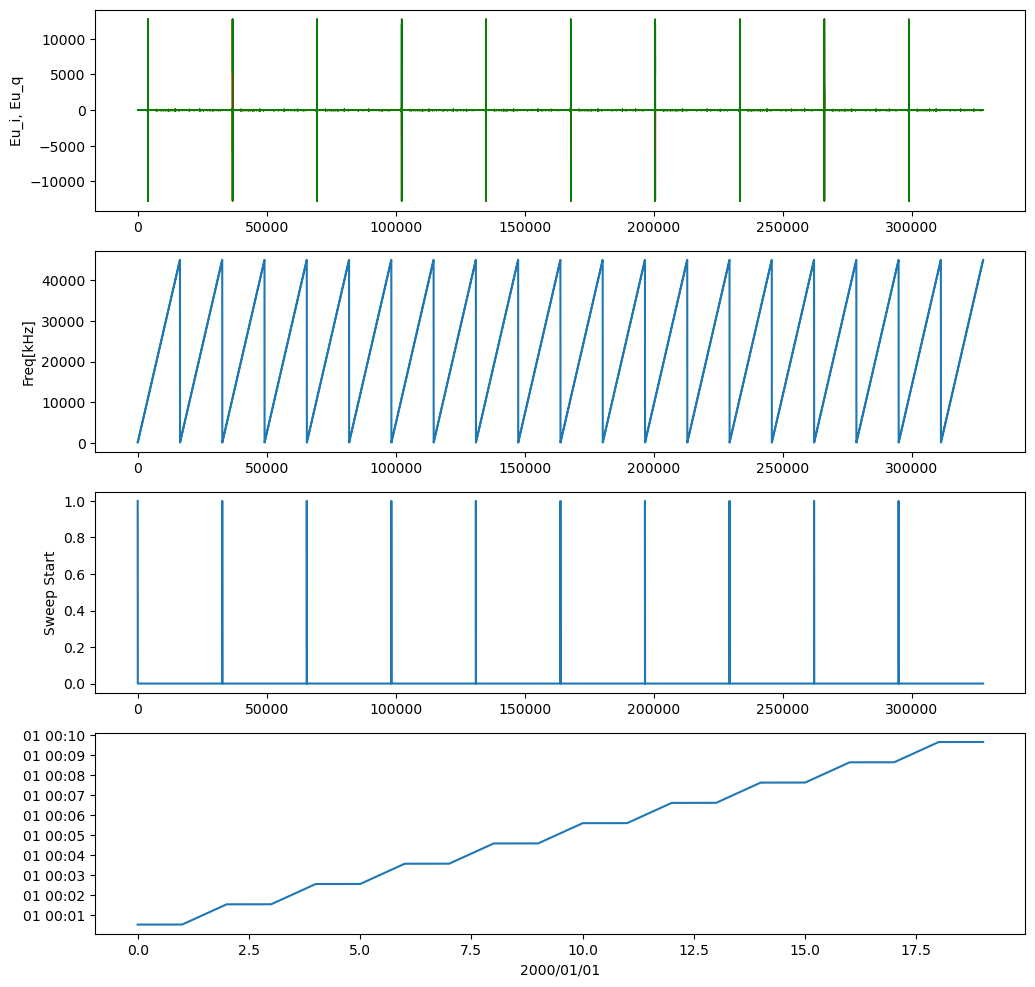

In [20]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)
ax4 = fig.add_subplot(4, 1, 4)

ax1.plot(np.ravel(data.Eu_i), '-r', linewidth=1)
ax1.plot(np.ravel(data.Eu_q), '-g', linewidth=1)
ax2.plot(np.ravel(data.frequency))
ax3.plot(np.ravel(data.sweep_start))
ax4.plot(np.ravel(data.epoch))
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
print(date)

ax1.set_ylabel('Eu_i, Eu_q')
ax2.set_ylabel('Freq[kHz]')
ax3.set_ylabel('Sweep Start')
ax4.set_xlabel(date)

# xlim=[458239, 458241]
# ax1.set_xlim(xlim)
# ax2.set_xlim(xlim)
# ax3.set_xlim(xlim)
plt.show()
png_fname = work_dir+data_name+'_raw.png'
fig.savefig(png_fname)


In [21]:
# Sped mode:  0 - low resolution,  1 - high resolution  
spec = juice_cdf.juice_getspec_hf_sid02(data, spec_mode)

spec.Eu_power = spec.Eu_power * 10**(cf/10)
spec.Ev_power = spec.Ev_power * 10**(cf/10)
spec.Ew_power = spec.Ew_power * 10**(cf/10)

n_time = spec.Eu_power.shape[1]
n_freq = spec.Eu_power.shape[0]
print(spec.Eu_power.shape, n_time, n_freq)

(array([     0,  32768,  65536,  98304, 131072, 163840, 196608, 229376,
       262144, 294912, 327680]),)
[ 0 0 2000-01-01 00:00:31.291199 ] length: 32768 == 64 * 512
[ 1 1 2000-01-01 00:01:32.291214 ] length: 32768 == 64 * 512
[ 2 2 2000-01-01 00:02:33.291183 ] length: 32768 == 64 * 512
[ 3 3 2000-01-01 00:03:34.291260 ] length: 32768 == 64 * 512
[ 4 4 2000-01-01 00:04:35.291214 ] length: 32768 == 64 * 512
[ 5 5 2000-01-01 00:05:36.291214 ] length: 32768 == 64 * 512
[ 6 6 2000-01-01 00:06:37.291183 ] length: 32768 == 64 * 512
[ 7 7 2000-01-01 00:07:38.291214 ] length: 32768 == 64 * 512
[ 8 8 2000-01-01 00:08:39.291183 ] length: 32768 == 64 * 512
[ 9 9 2000-01-01 00:09:40.291229 ] length: 32768 == 64 * 512
(32768, 10) 10 32768


# Spectra

# LOG: Frequency - Power

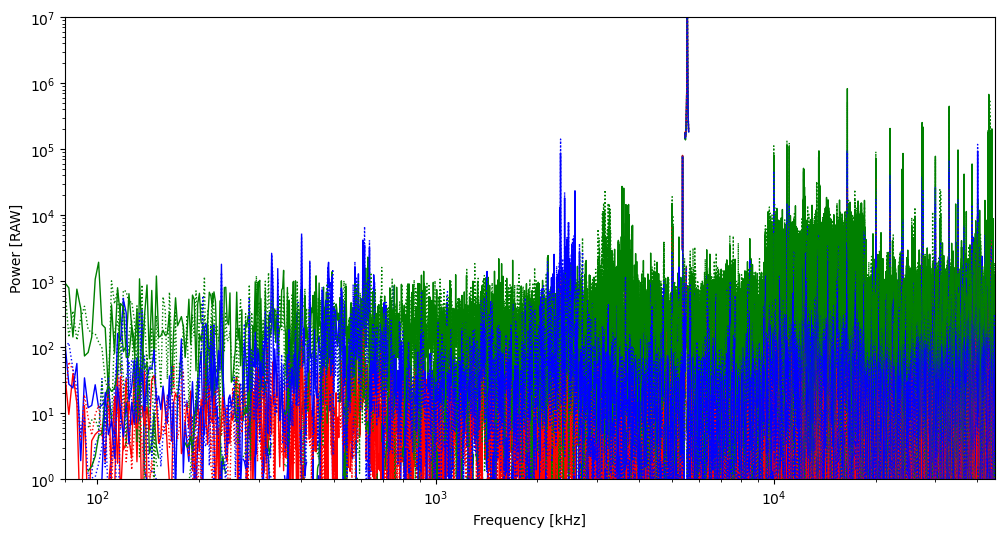

In [22]:
fig = plt.figure(figsize=(12, 6))

for i in range(spec.n_step):
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0], spec.Eu_power[i*spec.n_samp:(i+1)*spec.n_samp,0], '-r', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0], spec.Ev_power[i*spec.n_samp:(i+1)*spec.n_samp,0], '-g', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0], spec.Ew_power[i*spec.n_samp:(i+1)*spec.n_samp,0], '-b', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], spec.Eu_power[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], ':r', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], spec.Ev_power[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], ':g', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], spec.Ew_power[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], ':b', linewidth=1)
    
plt.xlabel('Frequency [kHz]')
plt.xscale('log')
plt.xlim(f_min, f_max)

plt.yscale('log')
if cal_mode == 0:
    plt.ylabel('Power [RAW]')
elif cal_mode == 1:
    plt.ylabel('Power [dBm@AD]')
elif cal_mode == 2:
    plt.ylabel('Power [V^2@ADC]')
plt.ylim(10**p_min, 10**p_max)

plt.show()
png_fname = work_dir+data_name+'_spec-log.png'
if (spec_mode>0):
    png_fname = work_dir+data_name+'_spec-log_h.png'
fig.savefig(png_fname)

# Linear: Frequency - Power diagram

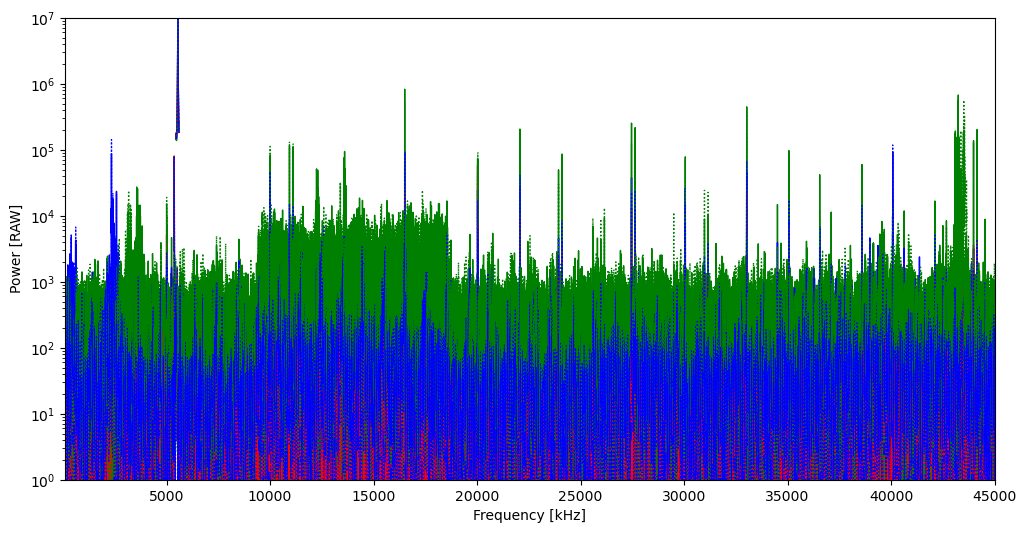

In [23]:
fig = plt.figure(figsize=(12, 6))

for i in range(spec.n_step):
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0], spec.Eu_power[i*spec.n_samp:(i+1)*spec.n_samp,0], '-r', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0], spec.Ev_power[i*spec.n_samp:(i+1)*spec.n_samp,0], '-g', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0], spec.Ew_power[i*spec.n_samp:(i+1)*spec.n_samp,0], '-b', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], spec.Eu_power[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], ':r', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], spec.Ev_power[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], ':g', linewidth=1)
    plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], spec.Ew_power[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], ':b', linewidth=1)

plt.xlabel('Frequency [kHz]')
plt.xlim(f_min, f_max)

plt.yscale('log')
if cal_mode == 0:
    plt.ylabel('Power [RAW]')
elif cal_mode == 1:
    plt.ylabel('Power [dBm@AD]')
elif cal_mode == 2:
    plt.ylabel('Power [V^2@ADC]')
plt.ylim(10**p_min, 10**p_max)

plt.show()
png_fname = work_dir+data_name+'_spec.png'
if (spec_mode>0):
    png_fname = work_dir+data_name+'_spec_h.png'
fig.savefig(png_fname)

# LOG: Frequency - Time diagram

/var/folders/h3/4_tnwr0x0v9gcl5qc0vczzyr0000gn/T/ipykernel_55034/2581678266.py:27: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  p1 = ax1.pcolormesh(spec.epoch, spec.frequency, spec.Eu_power, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
/var/folders/h3/4_tnwr0x0v9gcl5qc0vczzyr0000gn/T/ipykernel_55034/2581678266.py:28: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  p2 = ax2.pcolormesh(spec.epoch, spec.frequency, spec.Ev_power, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
/var/folders/h3/4_tnwr0x0v9gcl5qc0vczzyr0000gn/T/ipykernel_55034/258167826

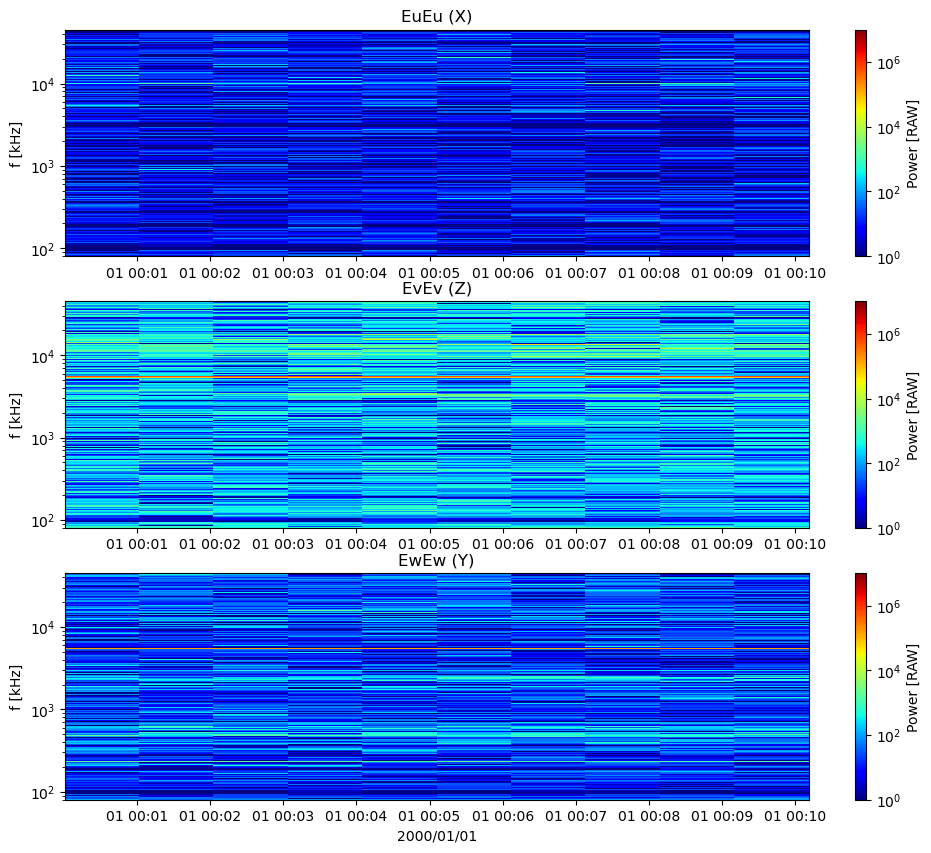

In [24]:
fig = plt.figure(figsize=(12, 10))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

# Y-axis
ax1.set_ylim(f_min, f_max)
ax2.set_ylim(f_min, f_max)
ax3.set_ylim(f_min, f_max)
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax1.set_ylabel('f [kHz]')
ax2.set_ylabel('f [kHz]')
ax3.set_ylabel('f [kHz]')

# X-axis
ax1.set_title('EuEu (X)')
ax2.set_title('EvEv (Z)')
ax3.set_title('EwEw (Y)')
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
ax3.set_xlabel(date)

# Plot
p1 = ax1.pcolormesh(spec.epoch, spec.frequency, spec.Eu_power, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
p2 = ax2.pcolormesh(spec.epoch, spec.frequency, spec.Ev_power, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
p3 = ax3.pcolormesh(spec.epoch, spec.frequency, spec.Ew_power, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')

if cal_mode == 0:
    str = 'Power [RAW]'
elif cal_mode == 1:
    str = 'Power [dBm@AD]'
elif cal_mode == 2:
    str = 'Power [V^2@ADC]'
pp1 = fig.colorbar(p1, ax=ax1, orientation="vertical")
pp1.set_label(str)
pp2 = fig.colorbar(p2, ax=ax2, orientation="vertical")
pp2.set_label(str)
pp3 = fig.colorbar(p3, ax=ax3, orientation="vertical")
pp3.set_label(str)

png_fname = work_dir+data_name+'_FT-log.png'
if (spec_mode>0):
    png_fname = work_dir+data_name+'_FT-log_h.png'
# fig.savefig(png_fname)


# Linear: Frequency - Time diagram

/var/folders/h3/4_tnwr0x0v9gcl5qc0vczzyr0000gn/T/ipykernel_55034/2417520130.py:24: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  p1 = ax1.pcolormesh(spec.epoch, spec.frequency, spec.Eu_power, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
/var/folders/h3/4_tnwr0x0v9gcl5qc0vczzyr0000gn/T/ipykernel_55034/2417520130.py:25: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  p2 = ax2.pcolormesh(spec.epoch, spec.frequency, spec.Ev_power, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
/var/folders/h3/4_tnwr0x0v9gcl5qc0vczzyr0000gn/T/ipykernel_55034/241752013

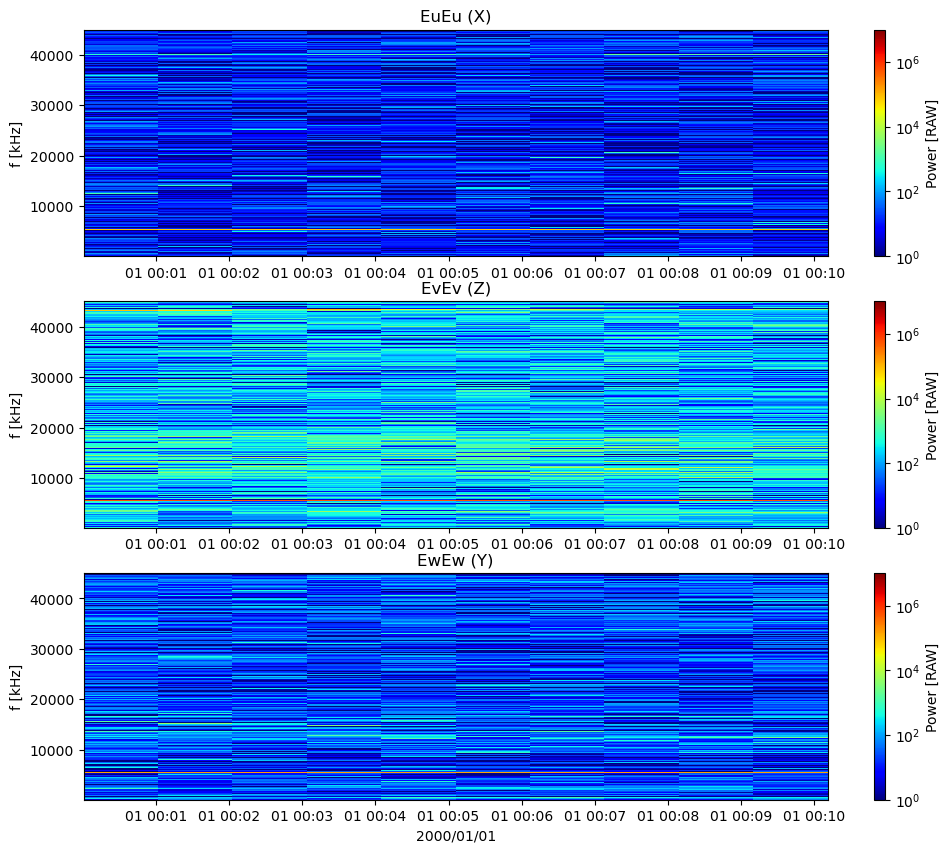

In [25]:
fig = plt.figure(figsize=(12, 10))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

# Y-axis
ax1.set_ylim(f_min, f_max)
ax2.set_ylim(f_min, f_max)
ax3.set_ylim(f_min, f_max)
ax1.set_ylabel('f [kHz]')
ax2.set_ylabel('f [kHz]')
ax3.set_ylabel('f [kHz]')

# X-axis
ax1.set_title('EuEu (X)')
ax2.set_title('EvEv (Z)')
ax3.set_title('EwEw (Y)')
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
ax3.set_xlabel(date)

# Plot
p1 = ax1.pcolormesh(spec.epoch, spec.frequency, spec.Eu_power, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
p2 = ax2.pcolormesh(spec.epoch, spec.frequency, spec.Ev_power, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')
p3 = ax3.pcolormesh(spec.epoch, spec.frequency, spec.Ew_power, norm=colors.LogNorm(vmin=10**p_min, vmax=10**p_max), cmap='jet')

if cal_mode == 0:
    str = 'Power [RAW]'
elif cal_mode == 1:
    str = 'Power [dBm@AD]'
elif cal_mode == 2:
    str = 'Power [V^2@ADC]'
pp1 = fig.colorbar(p1, ax=ax1, orientation="vertical")
pp1.set_label(str)
pp2 = fig.colorbar(p2, ax=ax2, orientation="vertical")
pp2.set_label(str)
pp3 = fig.colorbar(p3, ax=ax3, orientation="vertical")
pp3.set_label(str)

png_fname = work_dir+data_name+'_FT-log.png'
if (spec_mode>0):
    png_fname = work_dir+data_name+'_FT-log_h.png'
# fig.savefig(png_fname)

# Analyses

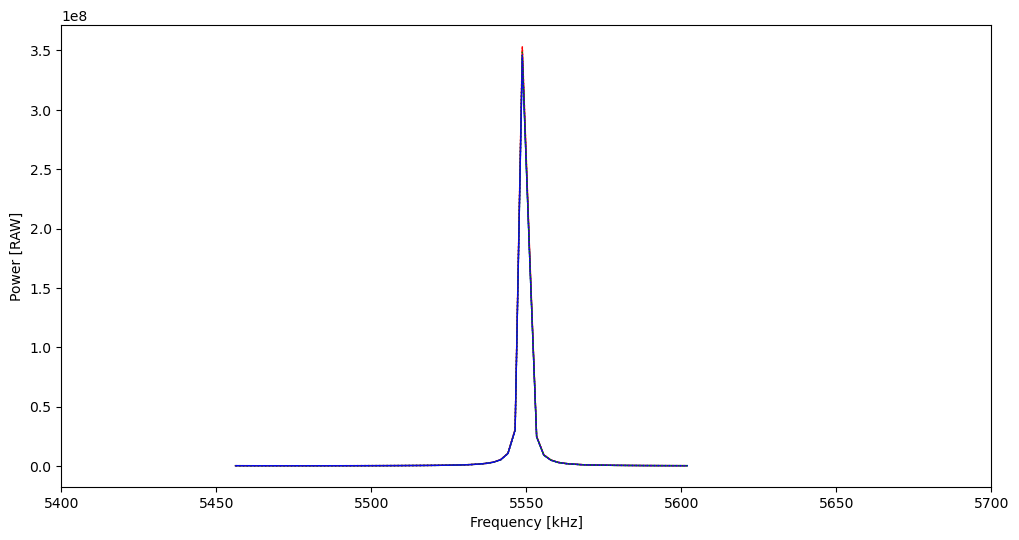

In [48]:
fig = plt.figure(figsize=(12, 6))

for i in range(spec.n_step):
    if i==62:
        plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0], spec.Eu_power[i*spec.n_samp:(i+1)*spec.n_samp,0], '-r', linewidth=1)
        plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0], spec.Ev_power[i*spec.n_samp:(i+1)*spec.n_samp,0], '-g', linewidth=1)
        plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,0], spec.Ew_power[i*spec.n_samp:(i+1)*spec.n_samp,0], '-b', linewidth=1)
        plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], spec.Eu_power[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], ':r', linewidth=1)
        plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], spec.Ev_power[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], ':g', linewidth=1)
        plt.plot(spec.frequency[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], spec.Ew_power[i*spec.n_samp:(i+1)*spec.n_samp,n_time-1], ':b', linewidth=1)

plt.xlabel('Frequency [kHz]')
# plt.xlim(f_min, f_max)
plt.xlim(5400, 5700)

# plt.yscale('log')
if cal_mode == 0:
    plt.ylabel('Power [RAW]')
elif cal_mode == 1:
    plt.ylabel('Power [dBm@AD]')
elif cal_mode == 2:
    plt.ylabel('Power [V^2@ADC]')
# plt.ylim(10**p_min, 10**p_max)

plt.show()
png_fname = work_dir+data_name+'_spec.png'
if (spec_mode>0):
    png_fname = work_dir+data_name+'_spec_h.png'
fig.savefig(png_fname)

2000/01/01


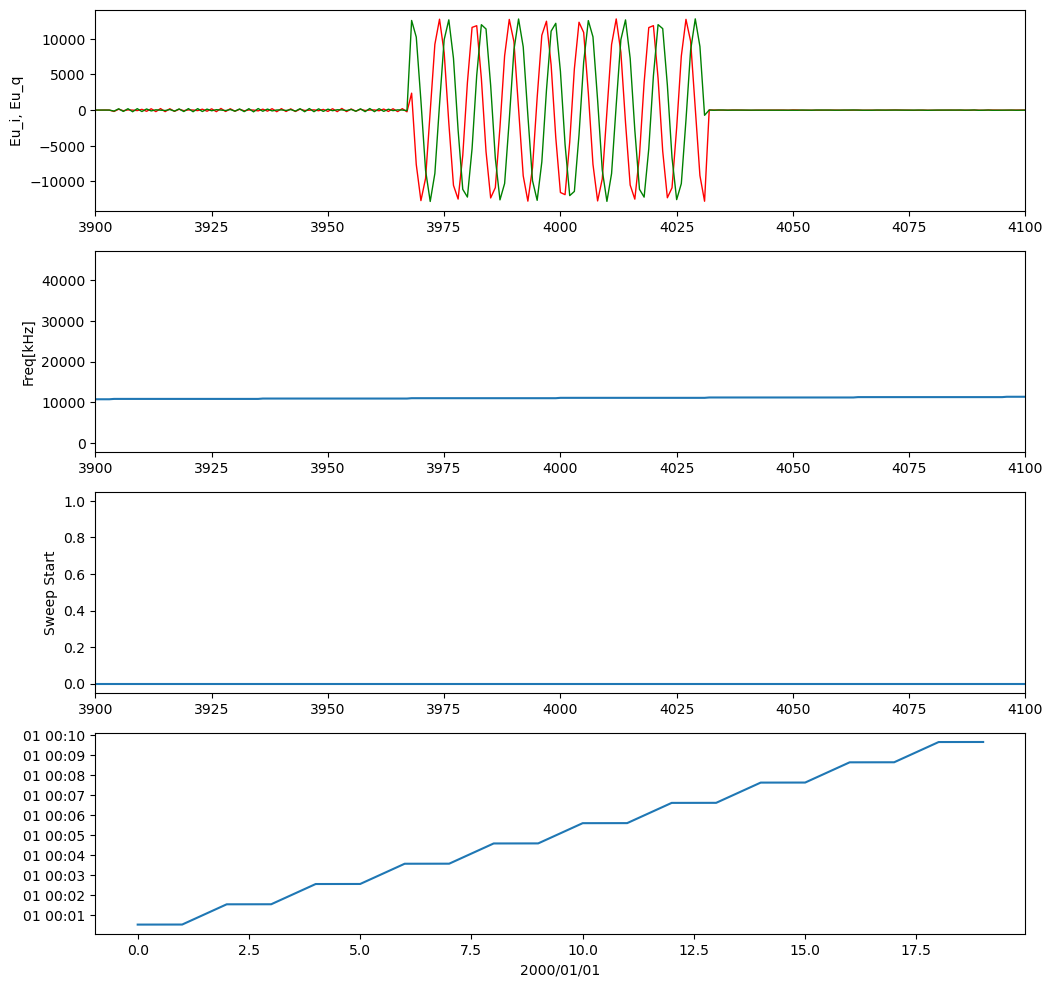

In [31]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)
ax4 = fig.add_subplot(4, 1, 4)

ax1.plot(np.ravel(data.Eu_i), '-r', linewidth=1)
ax1.plot(np.ravel(data.Eu_q), '-g', linewidth=1)
ax2.plot(np.ravel(data.frequency))
ax3.plot(np.ravel(data.sweep_start))
ax4.plot(np.ravel(data.epoch))
date = data.epoch[0]
date = date.strftime('%Y/%m/%d')
print(date)

ax1.set_ylabel('Eu_i, Eu_q')
ax2.set_ylabel('Freq[kHz]')
ax3.set_ylabel('Sweep Start')
ax4.set_xlabel(date)

xlim=[3900, 4100]
ax1.set_xlim(xlim)
ax2.set_xlim(xlim)
ax3.set_xlim(xlim)
plt.show()
png_fname = work_dir+data_name+'_raw.png'
fig.savefig(png_fname)
